Model for motor 6:


100%|██████████| 1/1 [00:06<00:00,  6.62s/it]



 New run:

testing performance, max error is: 8.0
testing performance, mean root square error is: 2.9767780041287626
testing performance, residual error > 0.9: 87.58091223844649%

 New run:

testing performance, accuracy is: 0.1472226403733253
testing performance, precision is: 0.06634582330697834
testing performance, recall: 0.6235864297253635
testing performance, F1: 0.11993164517632438


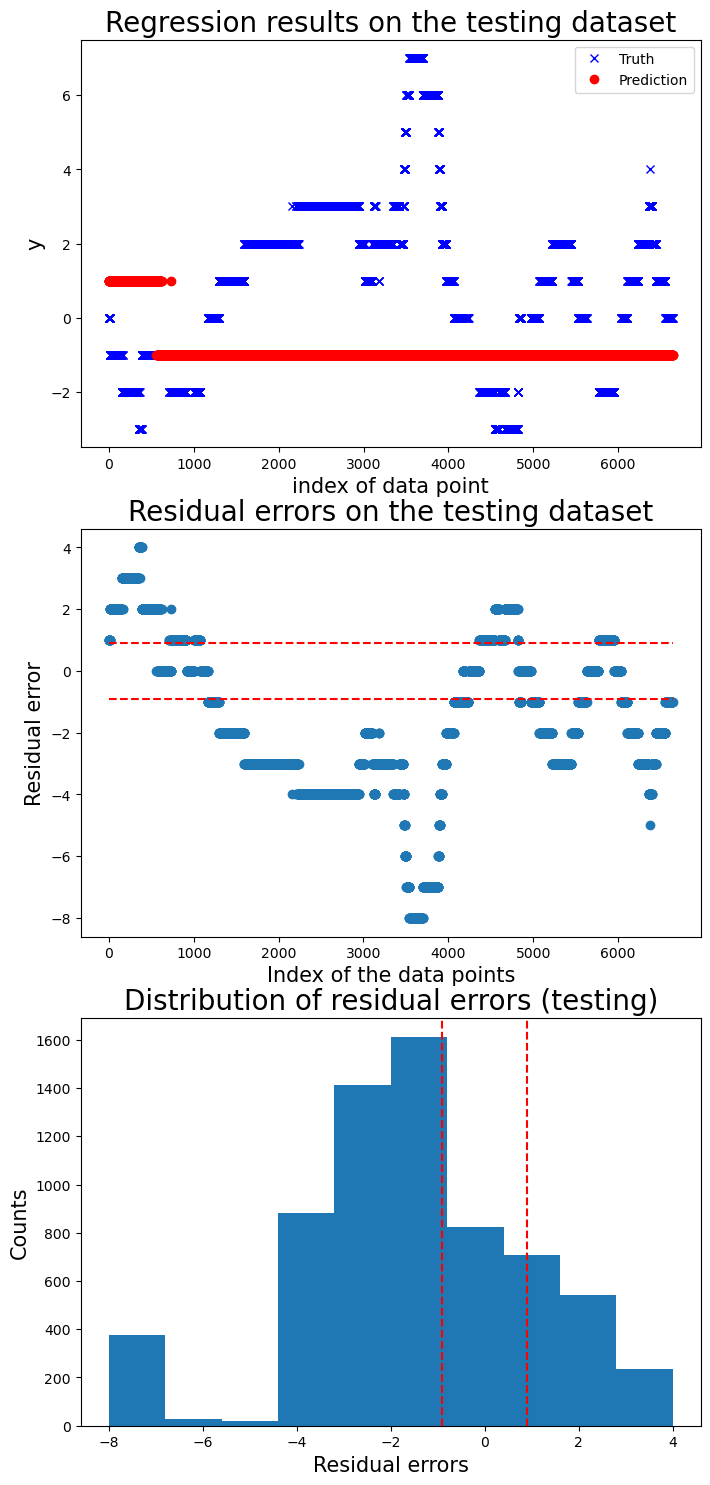

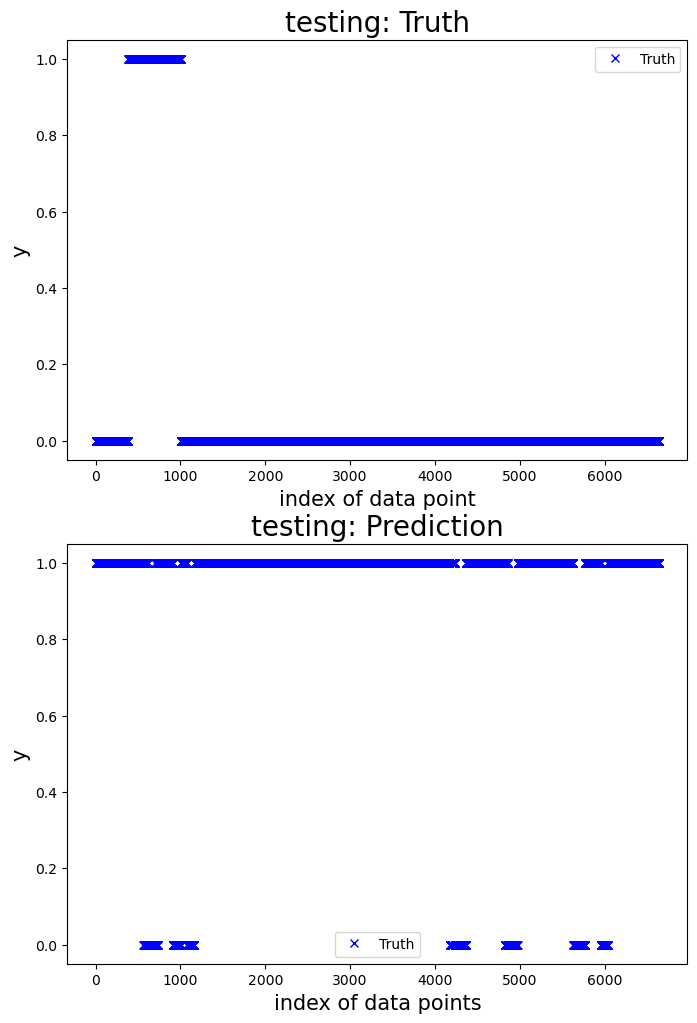

100%|██████████| 1/1 [00:00<00:00,  4.51it/s]



 New run:

testing performance, max error is: 8.0
testing performance, mean root square error is: 2.8828476912266474
testing performance, residual error > 0.9: 96.3963963963964%

 New run:

testing performance, accuracy is: 0.3333333333333333
testing performance, precision is: 0.34579439252336447
testing performance, recall: 0.9024390243902439
testing performance, F1: 0.5


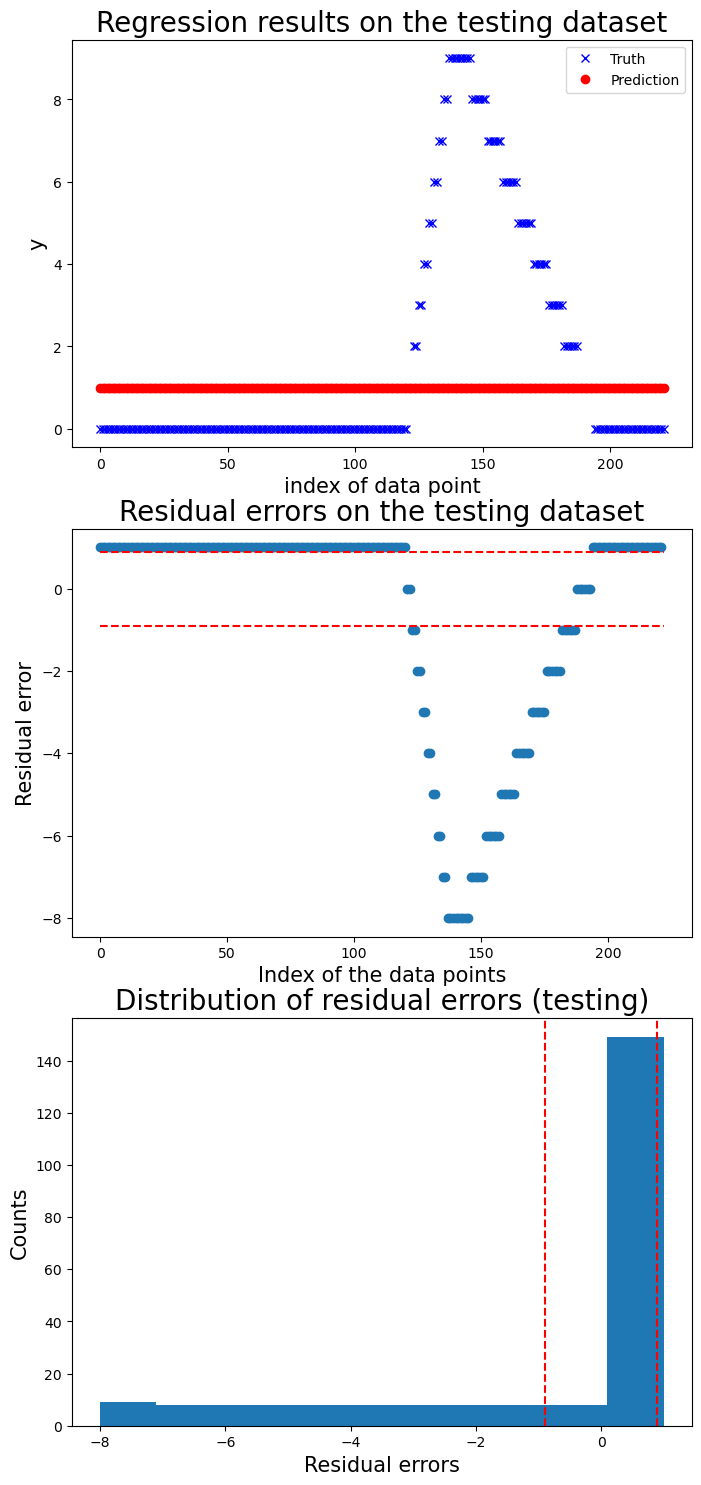

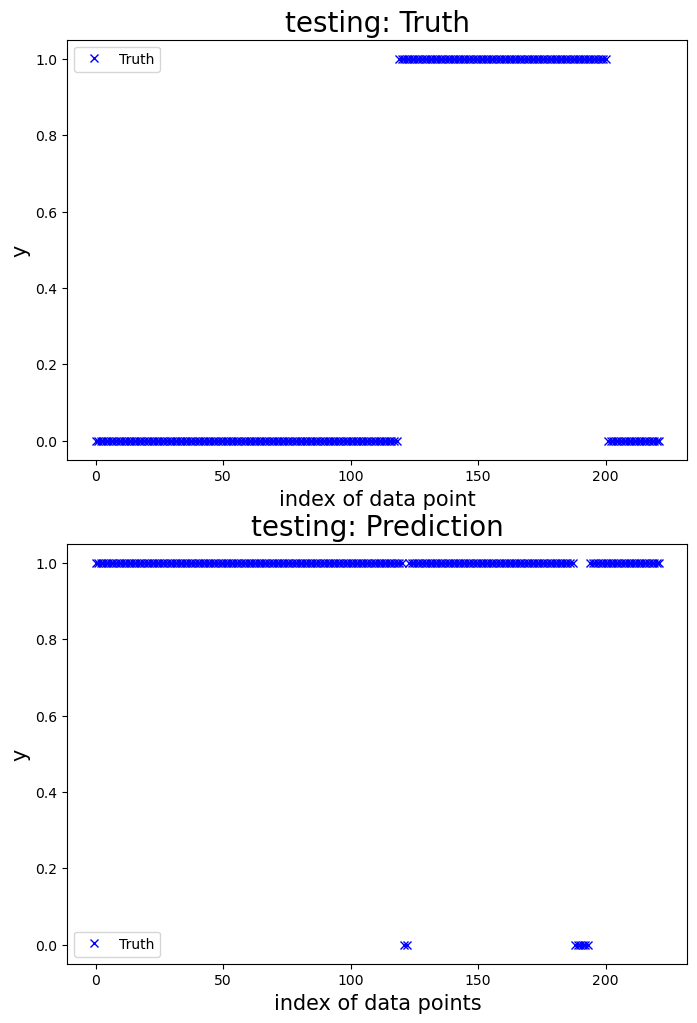

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]



 New run:

testing performance, max error is: 2.0
testing performance, mean root square error is: 1.0009070296649274
testing performance, residual error > 0.9: 93.10344827586206%

 New run:

testing performance, accuracy is: 0.16515426497277677
testing performance, precision is: 0.17738791423001948
testing performance, recall: 0.7054263565891473
testing performance, F1: 0.2834890965732087


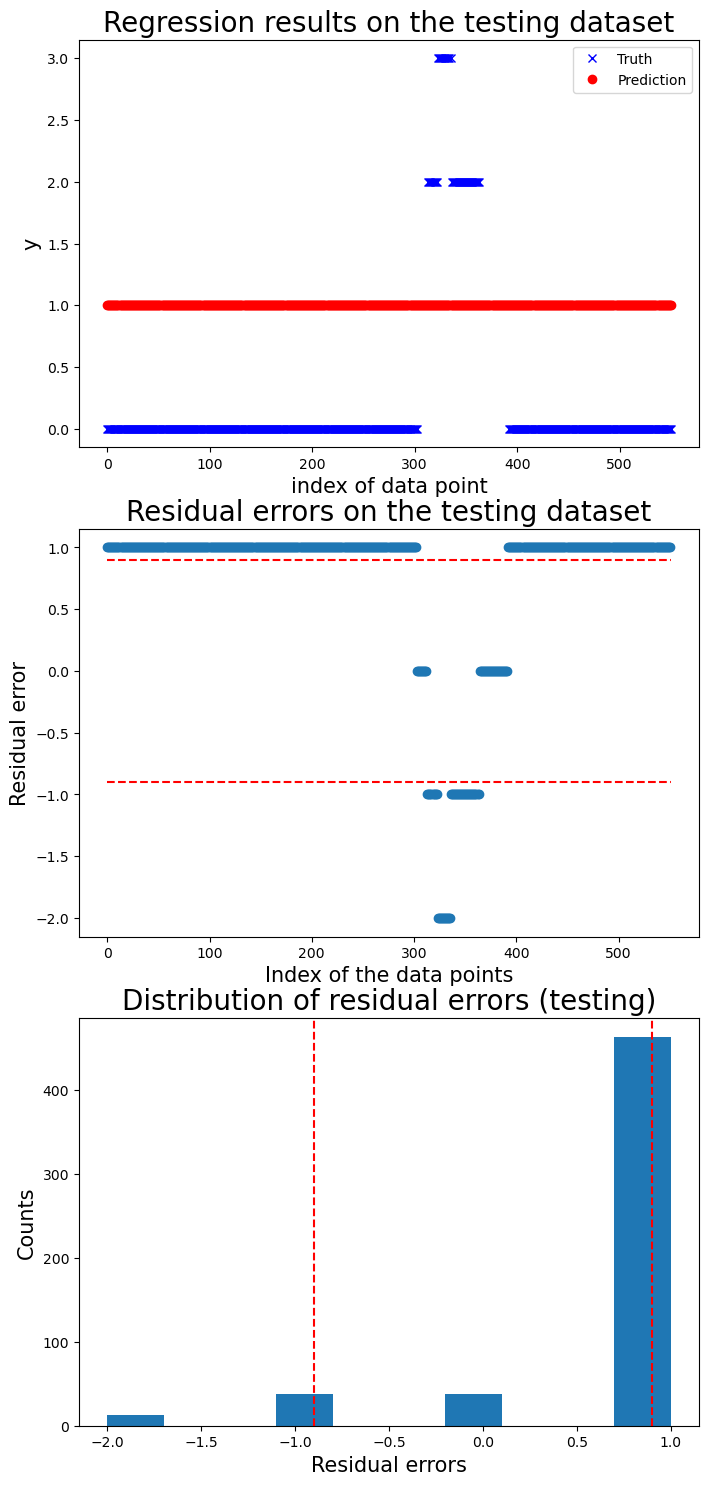

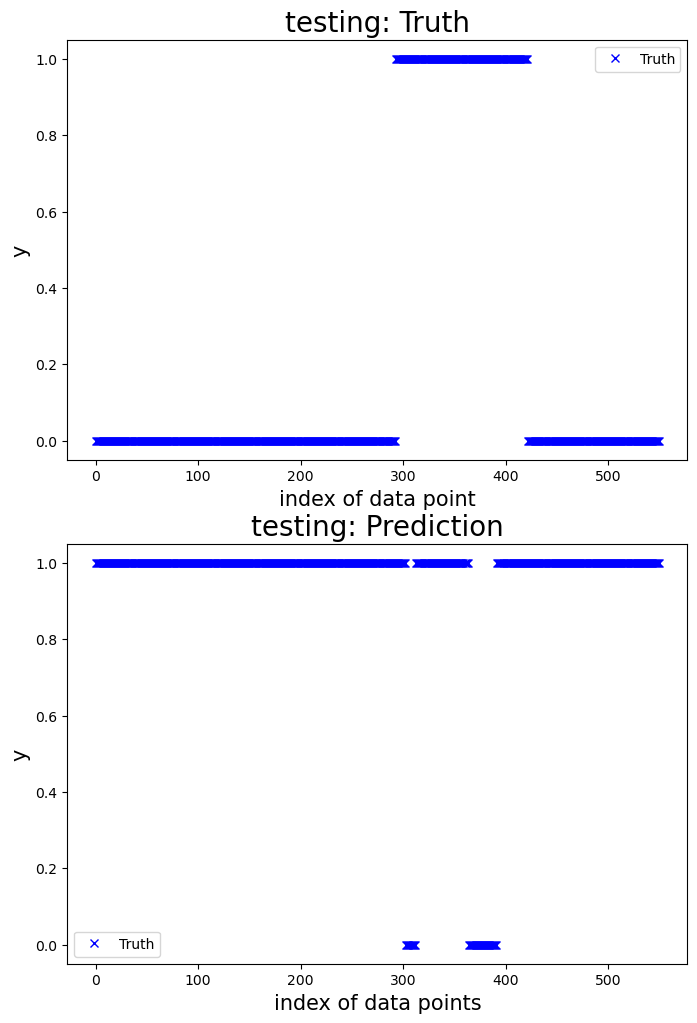

100%|██████████| 1/1 [00:01<00:00,  1.04s/it]



 New run:

testing performance, max error is: 1.0
testing performance, mean root square error is: 0.9863806871098915
testing performance, residual error > 0.9: 97.29468599033815%

 New run:

testing performance, accuracy is: 0.033816425120772944
testing performance, precision is: 0.03475670307845084
testing performance, recall: 0.5555555555555556
testing performance, F1: 0.06542056074766354


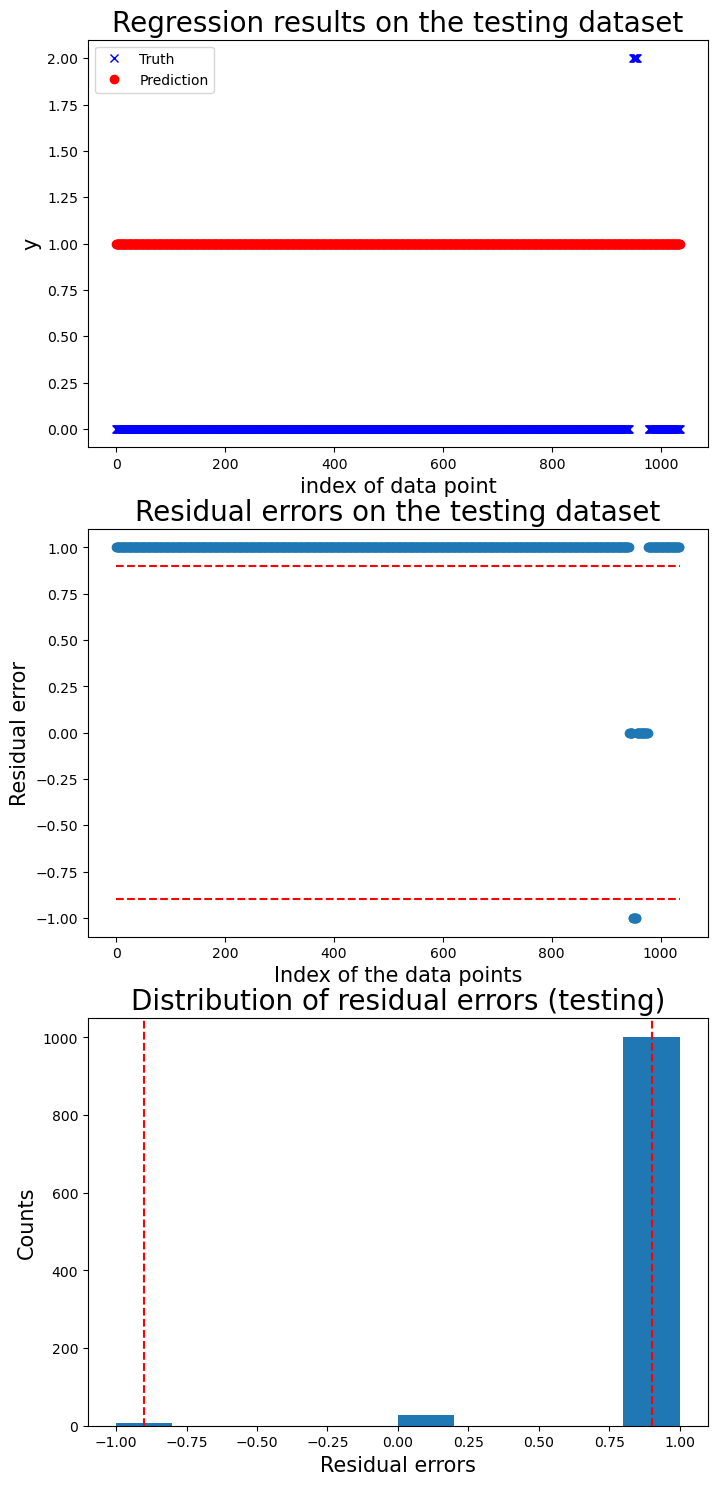

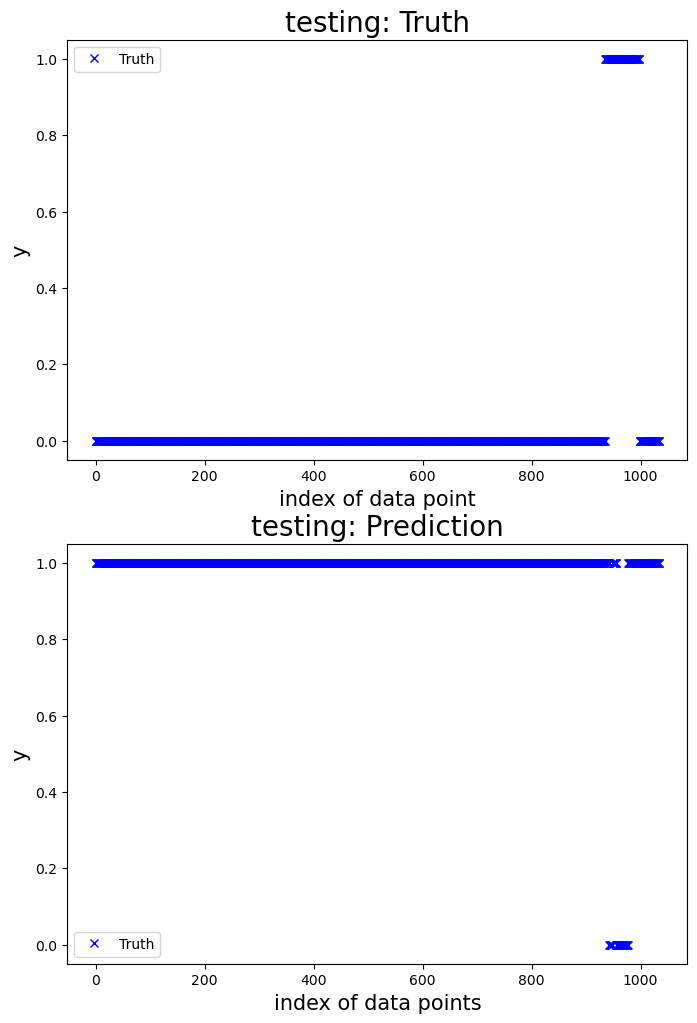

100%|██████████| 1/1 [00:01<00:00,  1.12s/it]



 New run:

testing performance, max error is: 12.0
testing performance, mean root square error is: 4.667167892882243
testing performance, residual error > 0.9: 87.63157894736841%

 New run:

testing performance, accuracy is: 0.41754385964912283
testing performance, precision is: 0.34134134134134136
testing performance, recall: 0.9827089337175793
testing performance, F1: 0.5066864784546805


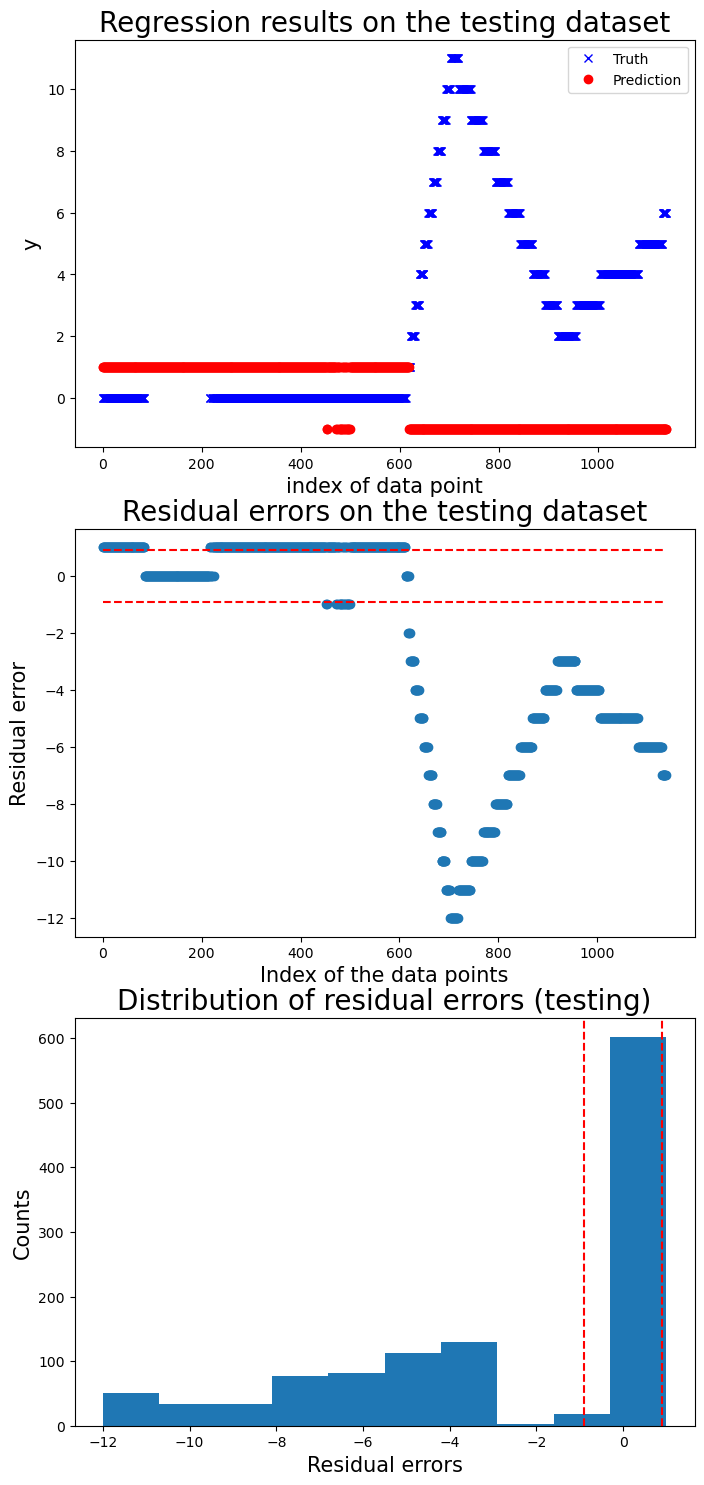

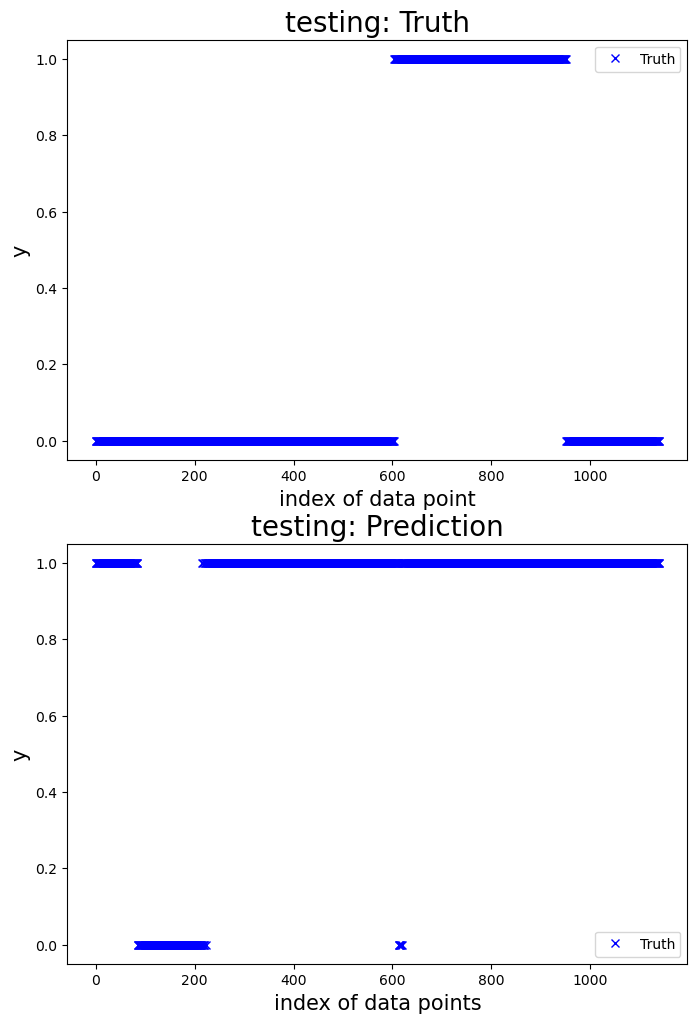

100%|██████████| 1/1 [00:00<00:00,  1.74it/s]



 New run:

testing performance, max error is: 15.0
testing performance, mean root square error is: 8.039204784014526
testing performance, residual error > 0.9: 98.30508474576271%

 New run:

testing performance, accuracy is: 0.7966101694915254
testing performance, precision is: 0.8103448275862069
testing performance, recall: 0.9791666666666666
testing performance, F1: 0.8867924528301887


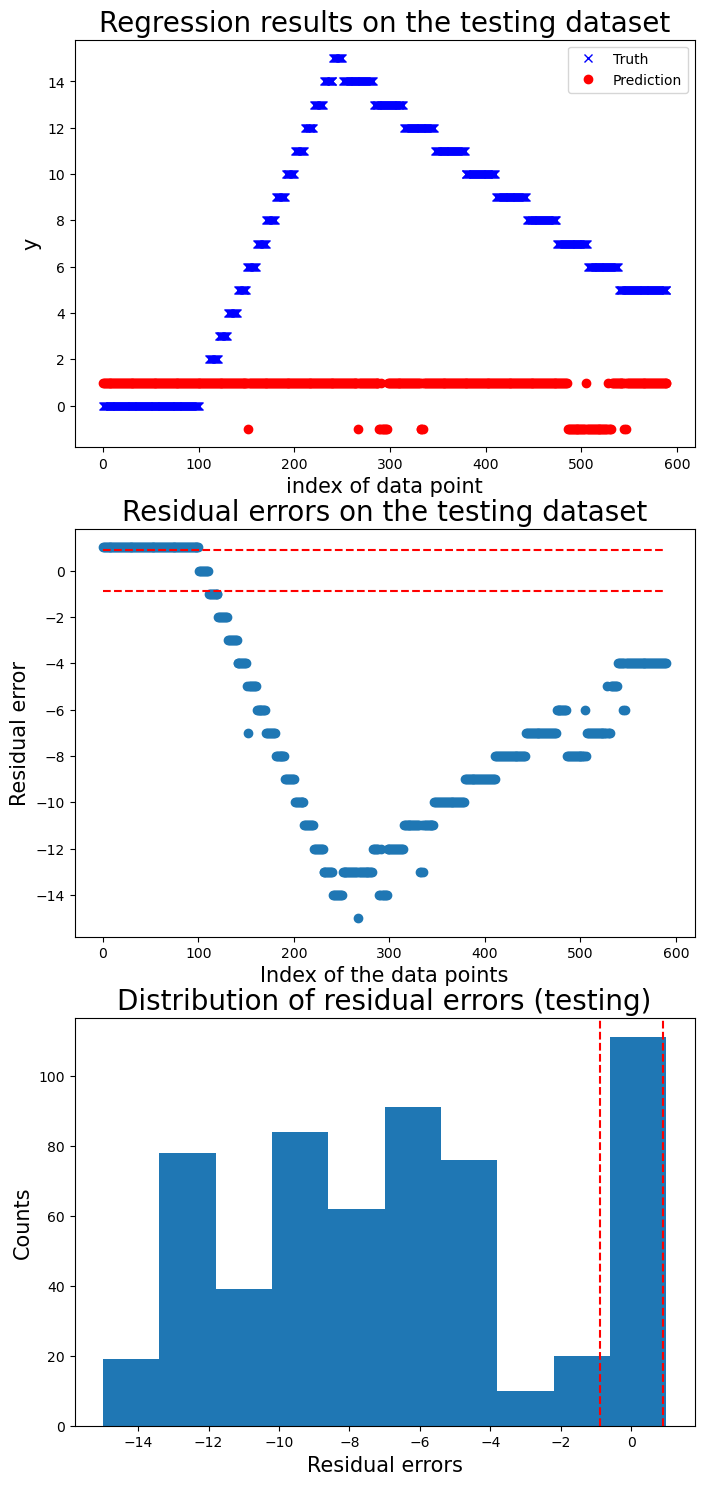

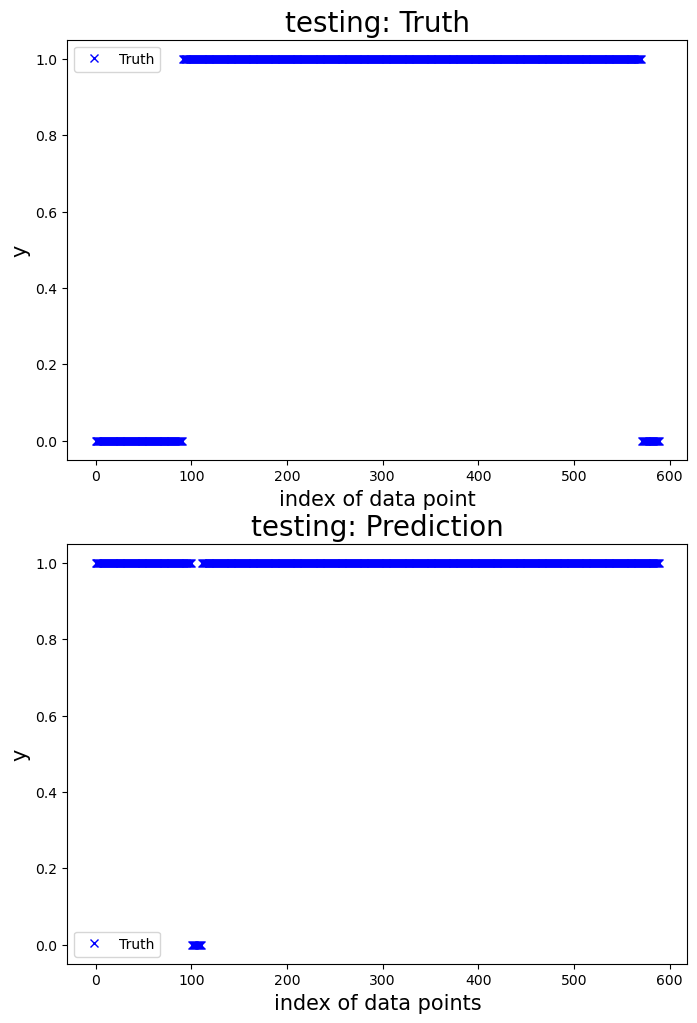

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]



 New run:

testing performance, max error is: 4.0
testing performance, mean root square error is: 2.747868492122576
testing performance, residual error > 0.9: 95.05208333333334%

 New run:

testing performance, accuracy is: 0.2760416666666667
testing performance, precision is: 0.26438356164383564
testing performance, recall: 0.910377358490566
testing performance, F1: 0.40976645435244163


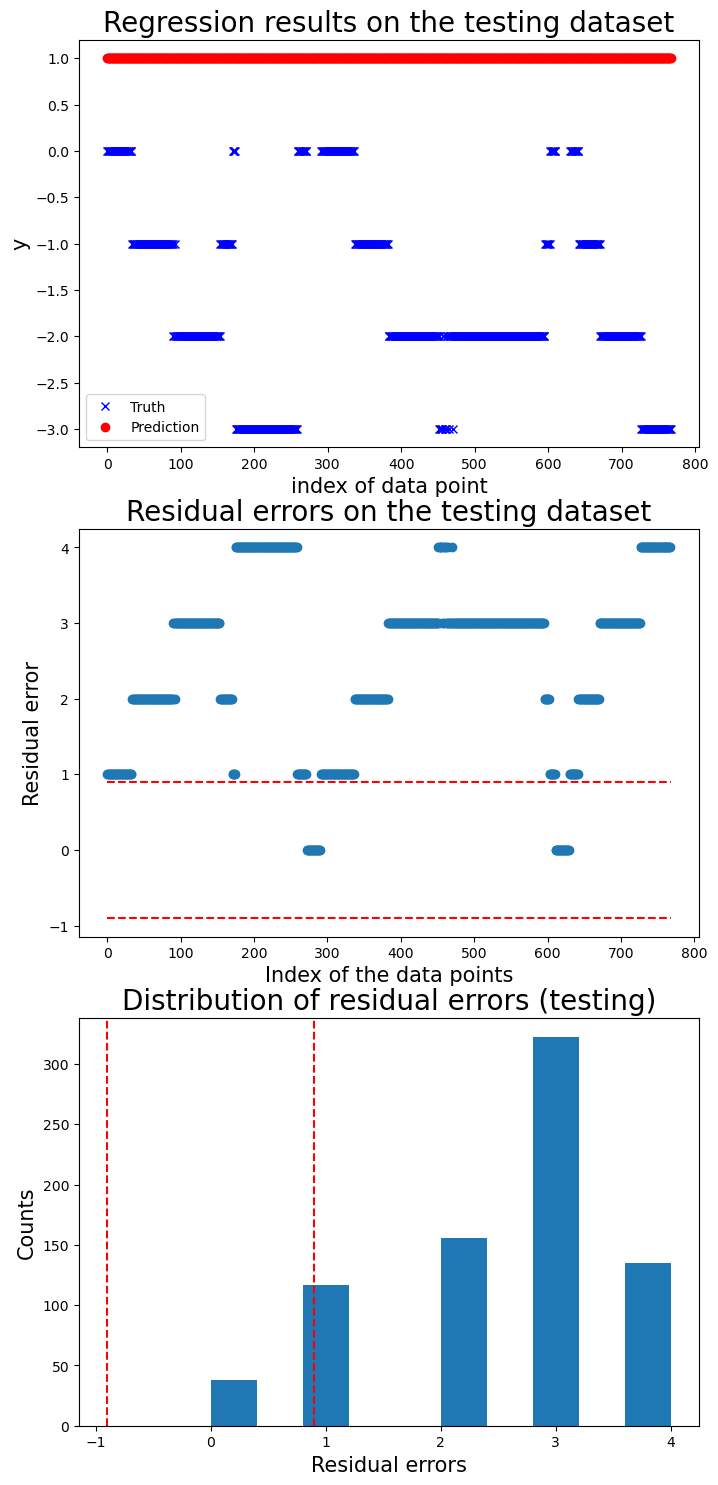

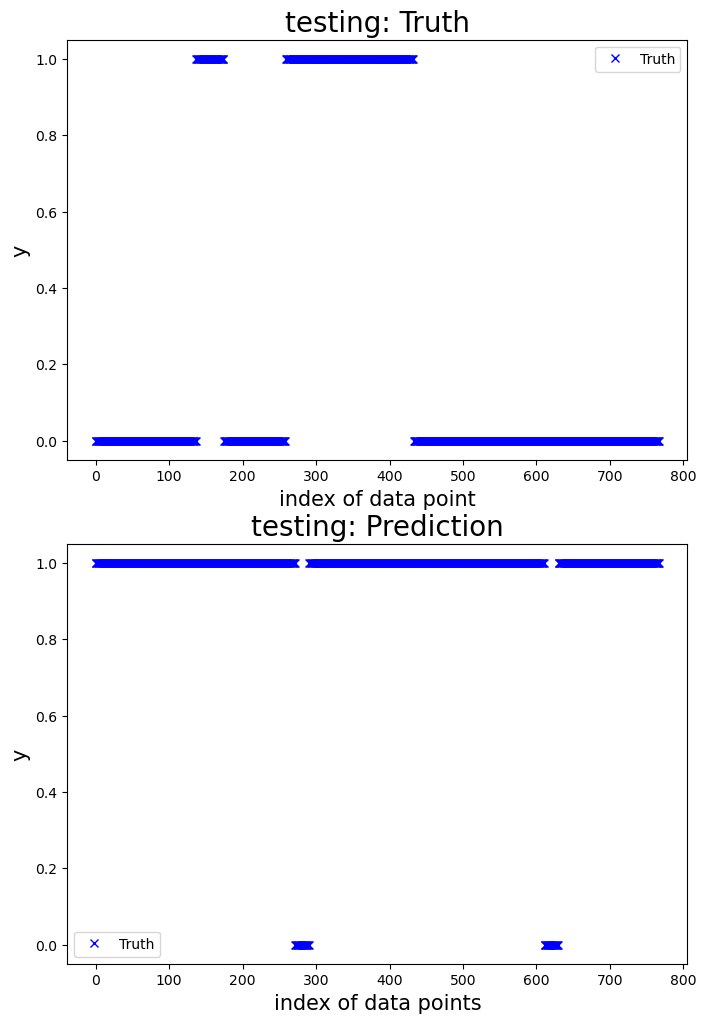

   Accuracy  Precision    Recall  F1 score
0  0.147223   0.066346  0.623586  0.119932
1  0.333333   0.345794  0.902439  0.500000
2  0.165154   0.177388  0.705426  0.283489
3  0.033816   0.034757  0.555556  0.065421
4  0.417544   0.341341  0.982709  0.506686
5  0.796610   0.810345  0.979167  0.886792
6  0.276042   0.264384  0.910377  0.409766


Mean performance metric and standard error:
Accuracy: 0.3100 +- 0.2496
Precision: 0.2915 +- 0.2598
Recall: 0.8085 +- 0.1768
F1 score: 0.3960 +- 0.2776


In [5]:
# Test the class FaultDetectReg
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utility import read_all_test_data_from_path, extract_selected_feature, prepare_sliding_window, FaultDetectReg

from sklearn.ensemble import IsolationForest

def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()
    df['temperature'] = df['temperature'] - df['temperature'].iloc[0]

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()
    df['voltage'] = df['voltage'] - df['voltage'].iloc[0]

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()
    df['position'] = df['position'] - df['position'].iloc[0]


# Read data.
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

# Pre-train the model.
# Get all the normal data.
normal_test_id = ['20240105_164214', 
    '20240105_165300', 
    '20240105_165972', 
    '20240320_152031', 
    '20240320_153841', 
    '20240320_155664', 
    '20240321_122650', 
    '20240325_135213',
    '20240325_152902', 
    '20240426_141190', 
    '20240426_141532', 
    '20240426_141602', 
    '20240426_141726', 
    '20240426_141938', 
    '20240426_141980', 
    '20240503_164435']

df_tr = df_data[df_data['test_condition'].isin(normal_test_id)]

feature_list_all = ['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# feature_list_all = ['time', 'data_motor_1_position', 
#                 'data_motor_2_position', 
#                 'data_motor_3_position', 
#                 'data_motor_4_position', 
#                 'data_motor_5_position', 
#                 'data_motor_6_position', 'data_motor_6_temperature']

# Prepare feature and response of the training dataset.
x_tr_org, y_temp_tr_org = extract_selected_feature(df_data=df_tr, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# Enrich the features based on the sliding window.
window_size = 10
sample_step = 1
prediction_lead_time = 1 
threshold = .9
abnormal_limit = 3

x_tr, y_temp_tr = prepare_sliding_window(df_x=x_tr_org, y=y_temp_tr_org, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('regressor', IsolationForest(n_estimators=50,max_samples=0.5,max_features=0.5, contamination=0.1))    # Step 2: model IsolationForest
]

# Create the pipeline
mdl_IsolationForest = Pipeline(steps)
# Fit the model
mdl = mdl_IsolationForest.fit(x_tr, y_temp_tr)

# Test data.
test_id = [
    '20240325_155003',
    '20240425_093699',
    '20240425_094425',
    '20240426_140055',
    '20240503_163963',
    '20240503_164675',
    '20240503_165189'
]
df_test = df_data[df_data['test_condition'].isin(test_id)]

# Define the fault detector.
detector_reg = FaultDetectReg(reg_mdl=mdl, threshold=threshold, abnormal_limit=abnormal_limit, window_size=window_size, sample_step=sample_step, pred_lead_time=prediction_lead_time)

# # Test
# _, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
# x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# # Predict the temperature
# detector_reg.threshold = 1
# y_label_pred_tr, y_temp_pred_tr = detector_reg.predict(df_x_test=x_tr_org, y_response_test=y_temp_tr_org)
# y_label_pred_tmp, y_temp_pred_tmp = detector_reg.predict(df_x_test=x_test_org, y_response_test=y_temp_test_org)

# # Get the true values.
# _, y_label_test = prepare_sliding_window(df_x=x_test_org, y=y_label_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='clf')
# _, y_temp_test_seq = prepare_sliding_window(df_x=x_test_org, y=y_temp_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')


# show_reg_result(y_tr=y_temp_tr, y_test=y_temp_test_seq, y_pred_tr=y_temp_pred_tr, y_pred=y_temp_pred_tmp, threshold=detector_reg.threshold)
# show_clf_result(y_tr=np.zeros(len(y_label_pred_tr)), y_test=y_label_test, y_pred_tr=y_label_pred_tr, y_pred=y_label_pred_tmp)

# # Run cross validation
n_fold = 7
_, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

motor_idx = 6
print(f'Model for motor {motor_idx}:')
# Run cross validation.
df_perf = detector_reg.run_cross_val(df_x=x_test_org, y_label=y_label_test_org, y_response=y_temp_test_org, 
                                        n_fold=n_fold)
print(df_perf)
print('\n')
# Print the mean performance and standard error.
print('Mean performance metric and standard error:')
for name, metric, error in zip(df_perf.columns, df_perf.mean(), df_perf.std()):
    print(f'{name}: {metric:.4f} +- {error:.4f}') 
print('\n')

Model for motor 6:


100%|██████████| 1/1 [00:26<00:00, 26.18s/it]



 New run:

testing performance, max error is: 8.0
testing performance, mean root square error is: 2.528923458945977
testing performance, residual error > 0.9: 89.4174318831853%

 New run:

testing performance, accuracy is: 0.17160921270510313
testing performance, precision is: 0.08888888888888889
testing performance, recall: 0.8529886914378029
testing performance, F1: 0.1610001524622656


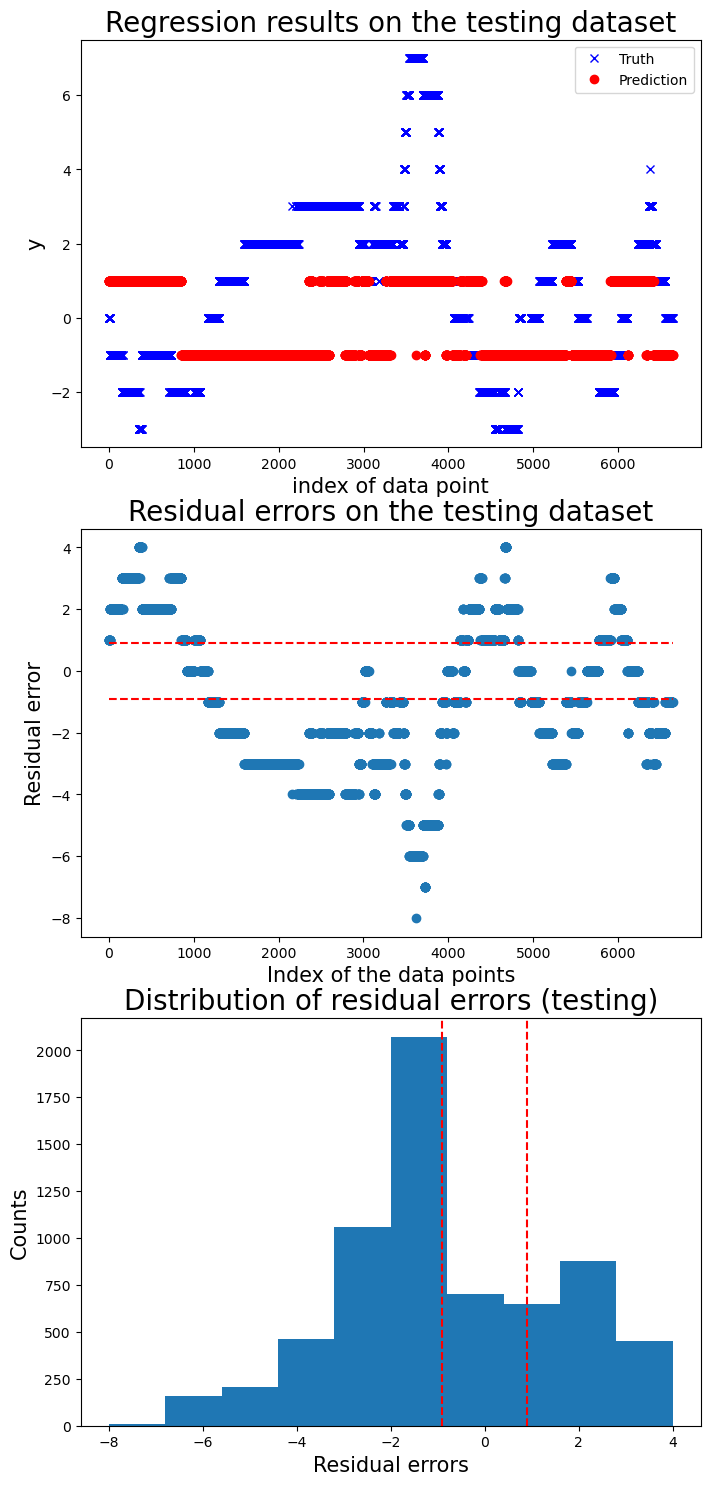

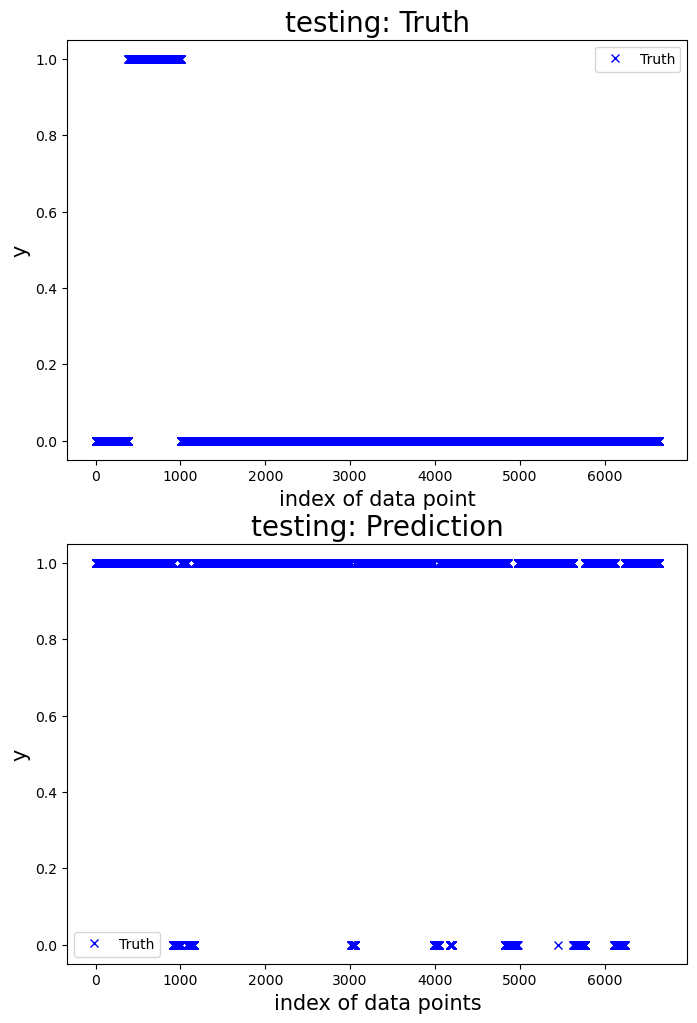

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]



 New run:

testing performance, max error is: 8.0
testing performance, mean root square error is: 2.8828476912266474
testing performance, residual error > 0.9: 96.3963963963964%

 New run:

testing performance, accuracy is: 0.3333333333333333
testing performance, precision is: 0.34579439252336447
testing performance, recall: 0.9024390243902439
testing performance, F1: 0.5


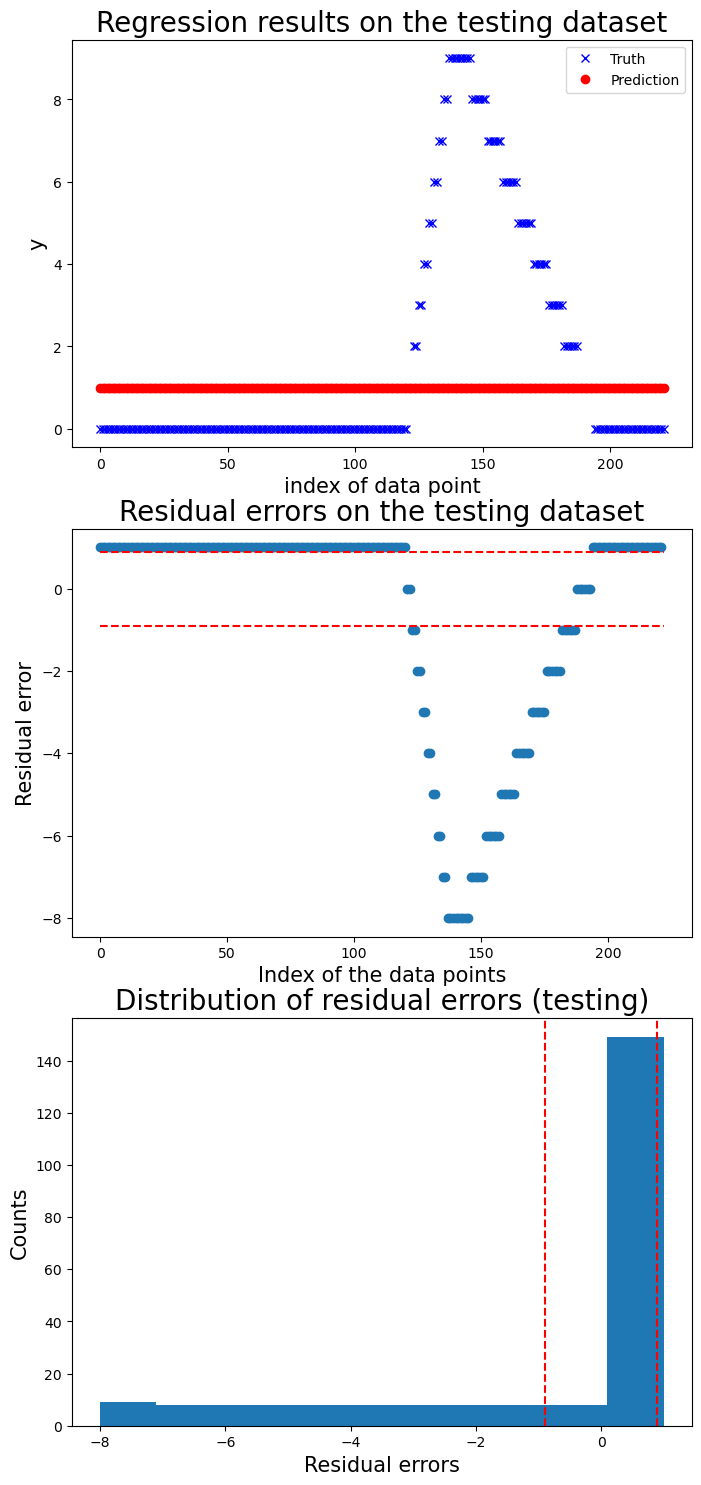

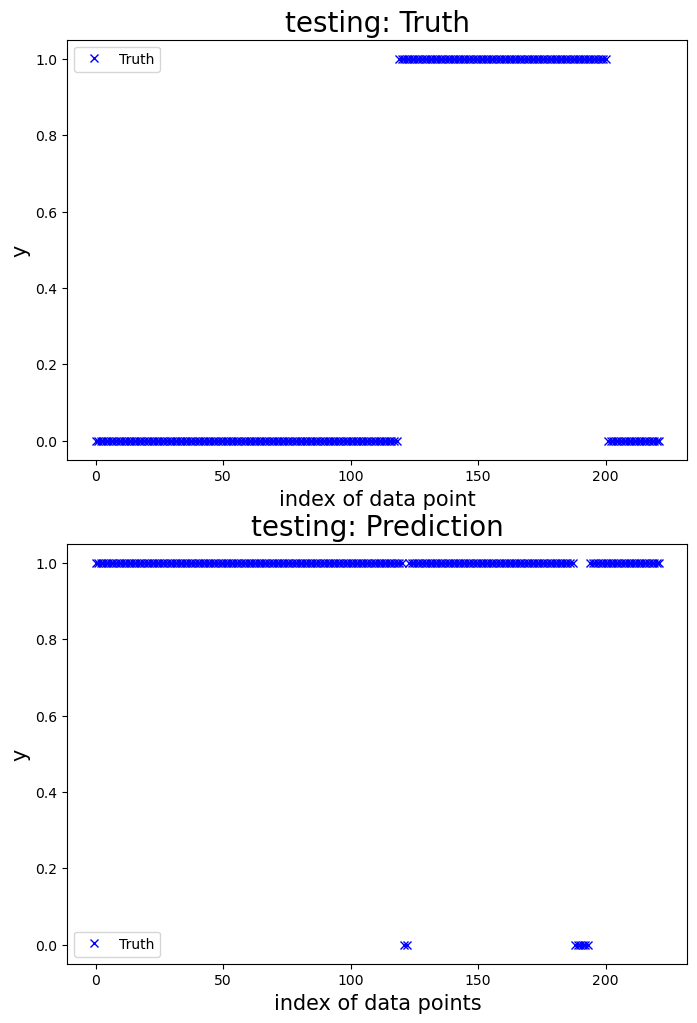

100%|██████████| 1/1 [00:02<00:00,  2.20s/it]



 New run:

testing performance, max error is: 2.0
testing performance, mean root square error is: 1.0009070296649274
testing performance, residual error > 0.9: 93.10344827586206%

 New run:

testing performance, accuracy is: 0.16515426497277677
testing performance, precision is: 0.17738791423001948
testing performance, recall: 0.7054263565891473
testing performance, F1: 0.2834890965732087


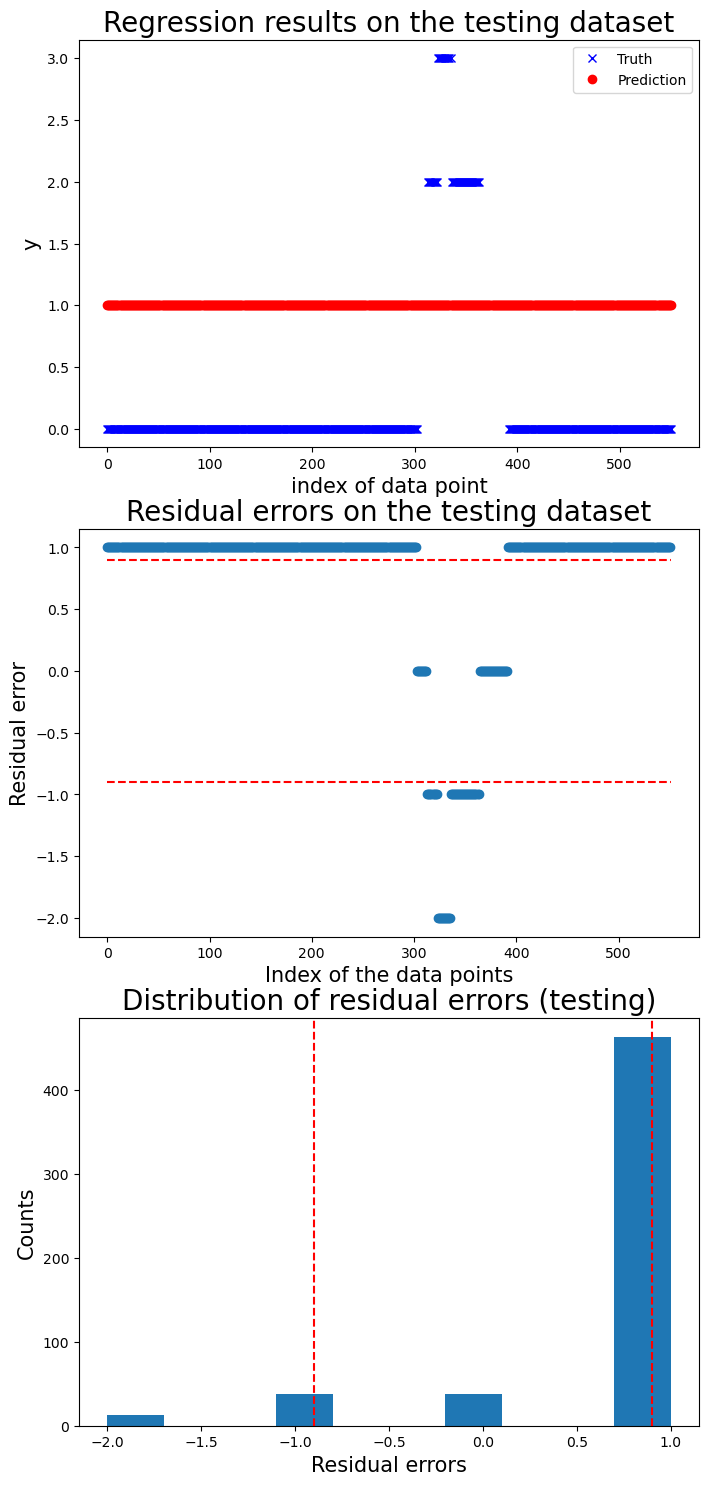

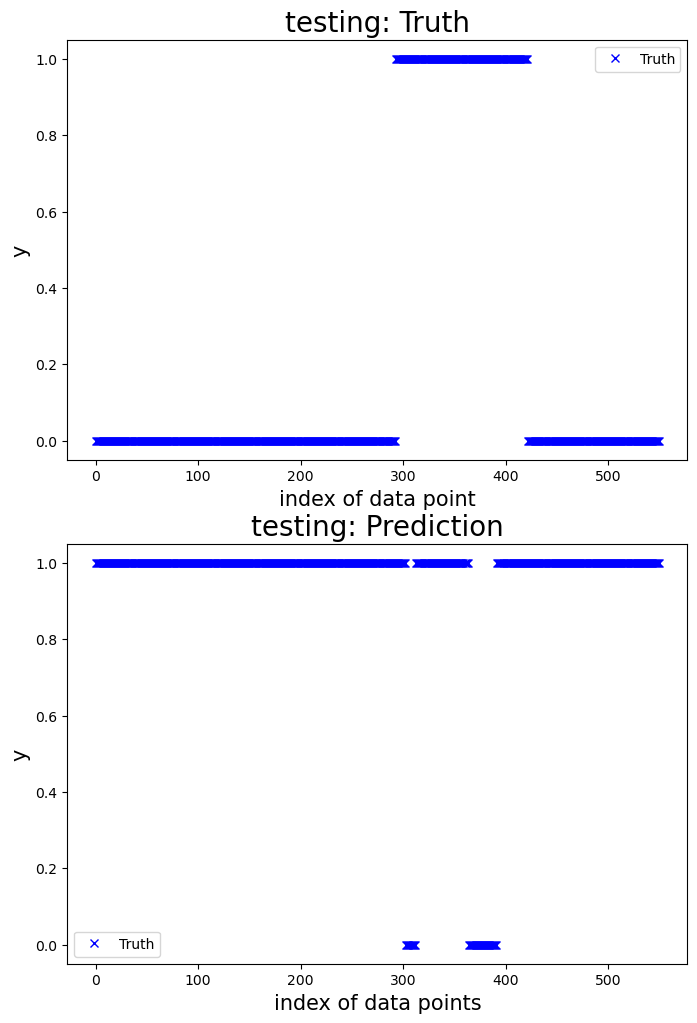

100%|██████████| 1/1 [00:04<00:00,  4.11s/it]



 New run:

testing performance, max error is: 1.0
testing performance, mean root square error is: 0.9863806871098915
testing performance, residual error > 0.9: 97.29468599033815%

 New run:

testing performance, accuracy is: 0.033816425120772944
testing performance, precision is: 0.03475670307845084
testing performance, recall: 0.5555555555555556
testing performance, F1: 0.06542056074766354


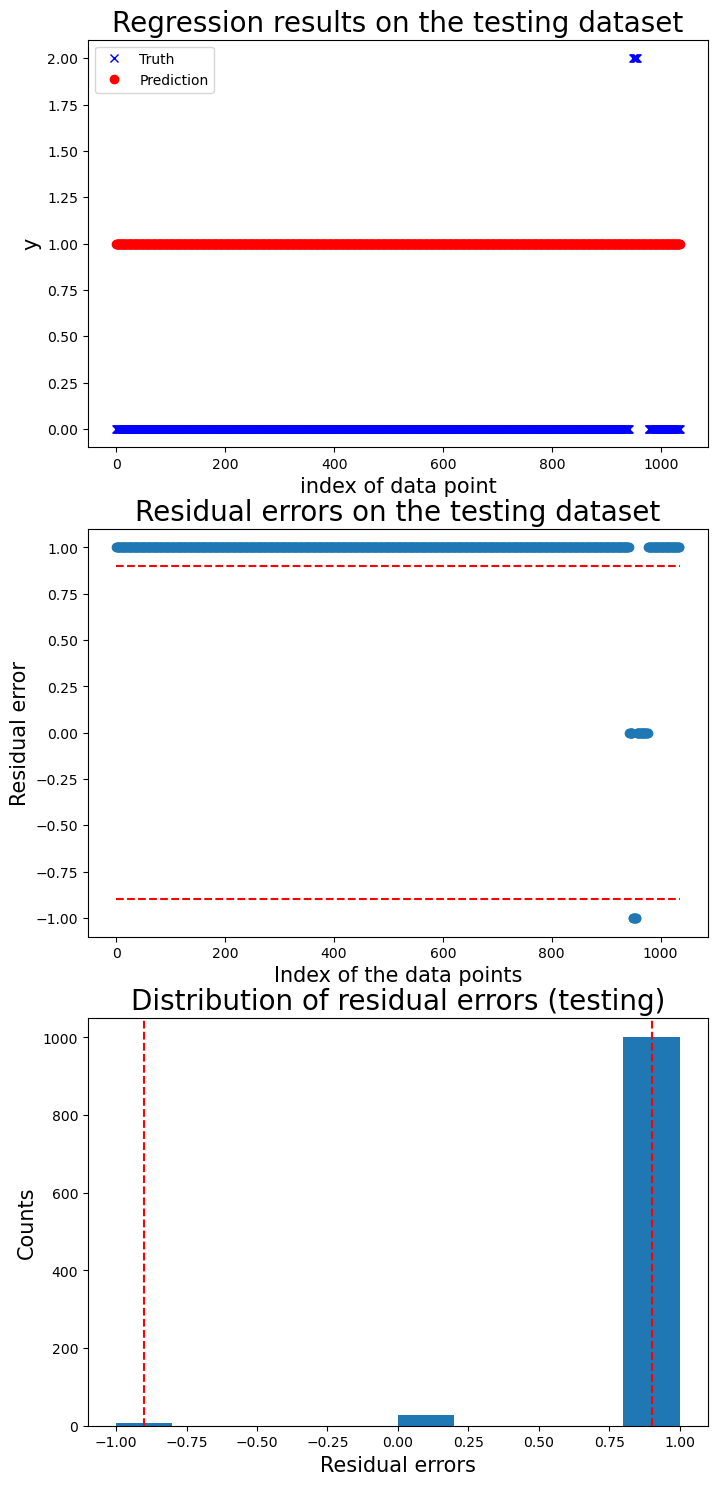

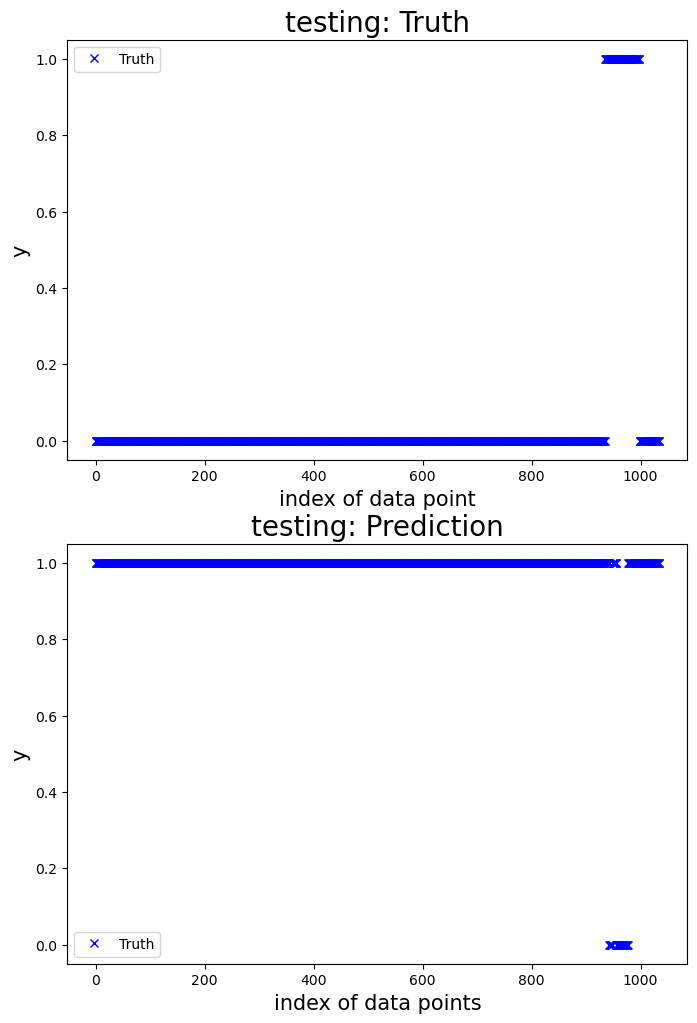

100%|██████████| 1/1 [00:04<00:00,  4.52s/it]



 New run:

testing performance, max error is: 10.0
testing performance, mean root square error is: 3.4625819389886683
testing performance, residual error > 0.9: 87.36842105263159%

 New run:

testing performance, accuracy is: 0.4149122807017544
testing performance, precision is: 0.3393574297188755
testing performance, recall: 0.9740634005763689
testing performance, F1: 0.5033507073715562


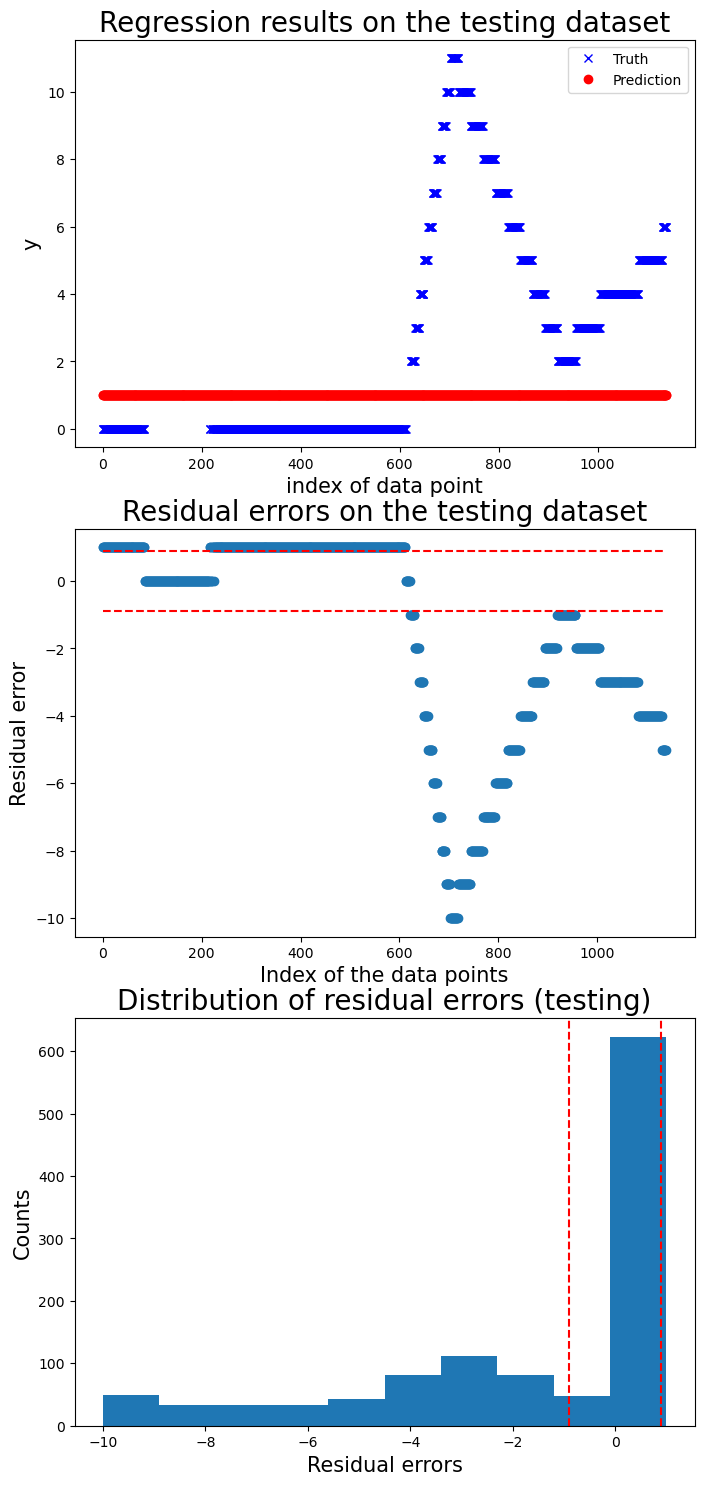

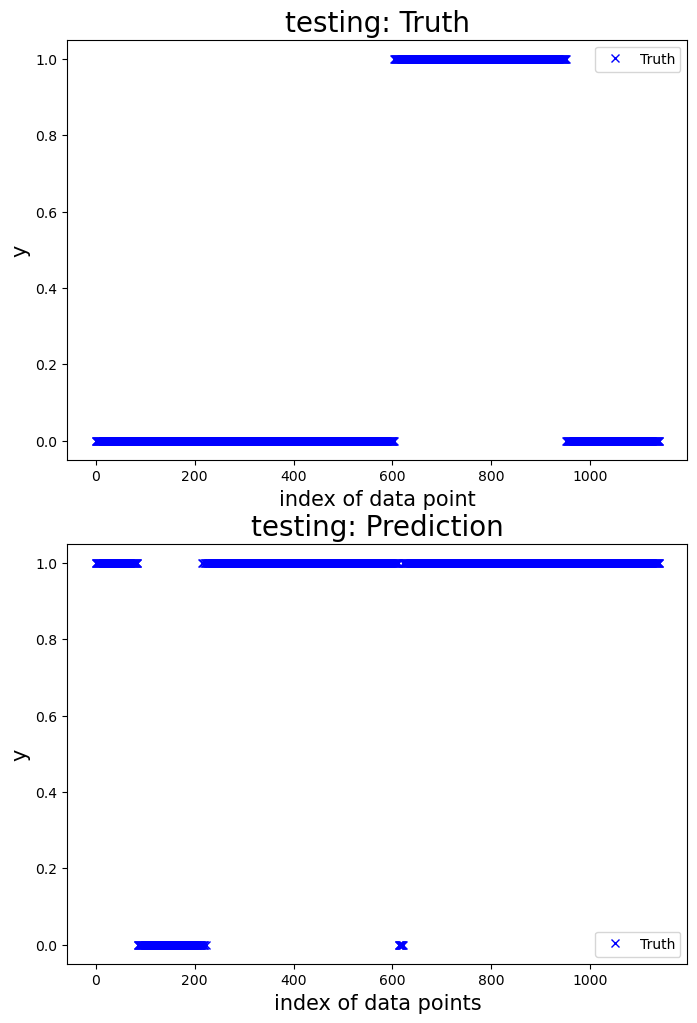

100%|██████████| 1/1 [00:02<00:00,  2.39s/it]



 New run:

testing performance, max error is: 14.0
testing performance, mean root square error is: 7.845434816351935
testing performance, residual error > 0.9: 98.30508474576271%

 New run:

testing performance, accuracy is: 0.7966101694915254
testing performance, precision is: 0.8103448275862069
testing performance, recall: 0.9791666666666666
testing performance, F1: 0.8867924528301887


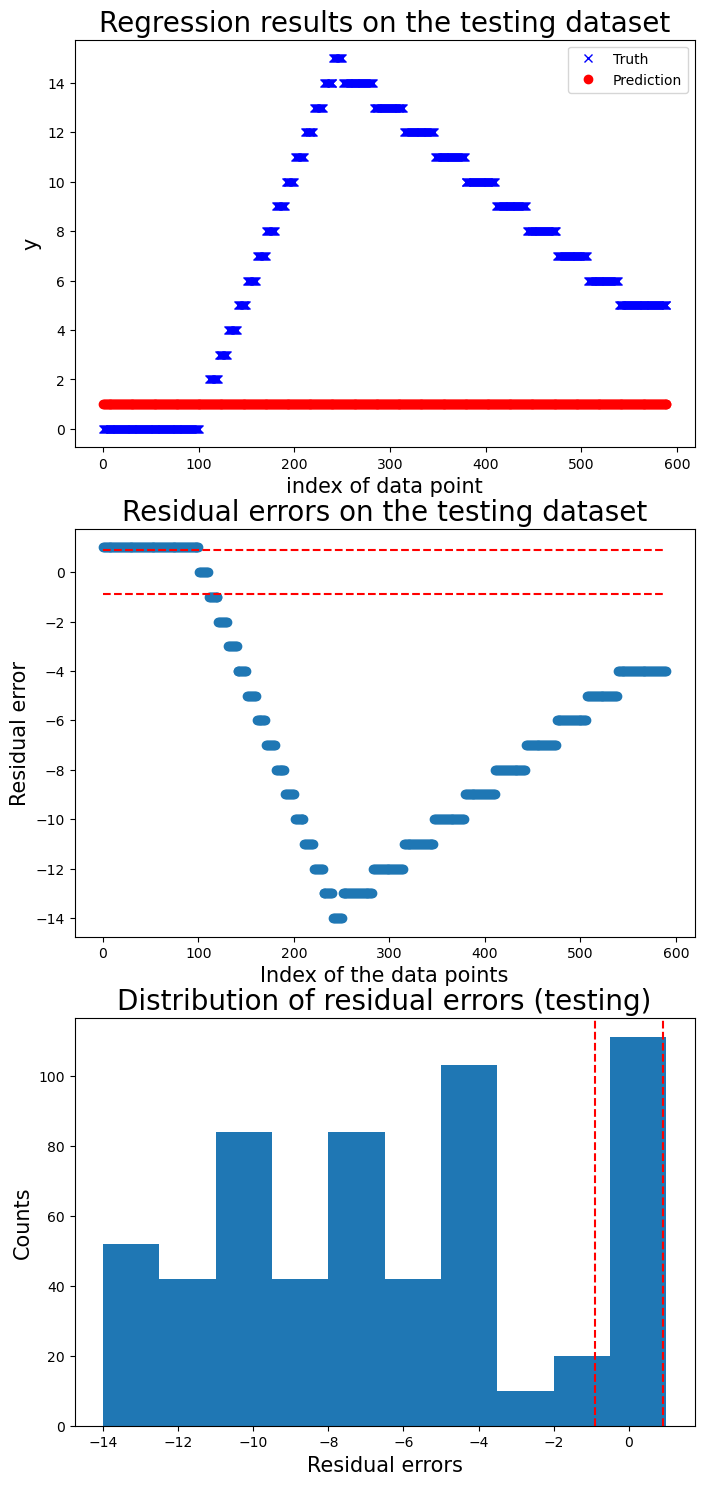

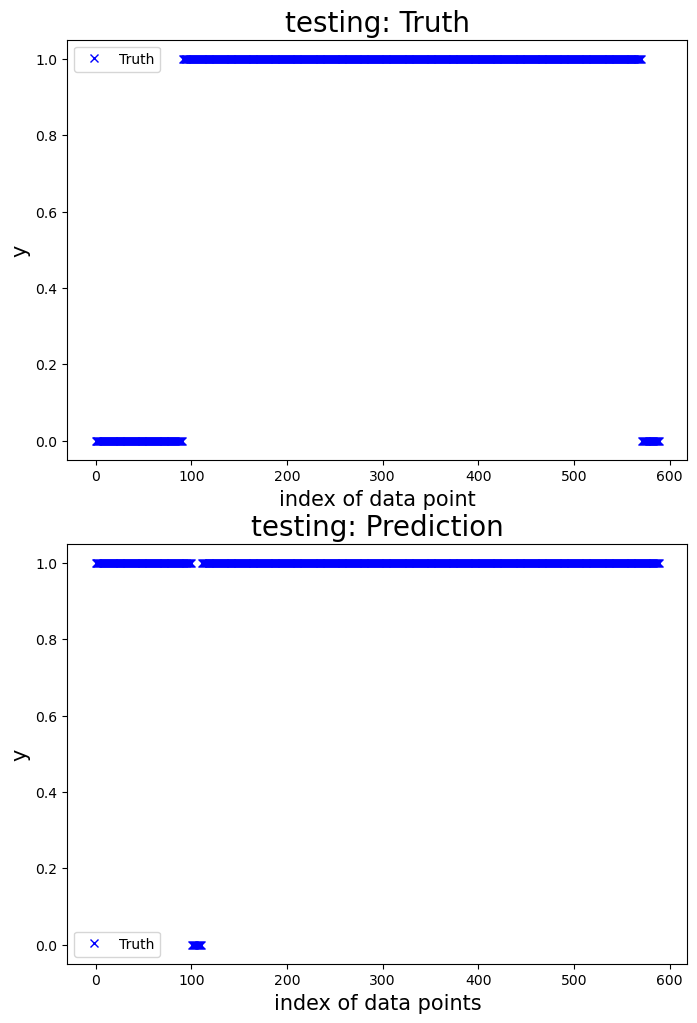

100%|██████████| 1/1 [00:03<00:00,  3.05s/it]



 New run:

testing performance, max error is: 4.0
testing performance, mean root square error is: 2.747868492122576
testing performance, residual error > 0.9: 95.05208333333334%

 New run:

testing performance, accuracy is: 0.2760416666666667
testing performance, precision is: 0.26438356164383564
testing performance, recall: 0.910377358490566
testing performance, F1: 0.40976645435244163


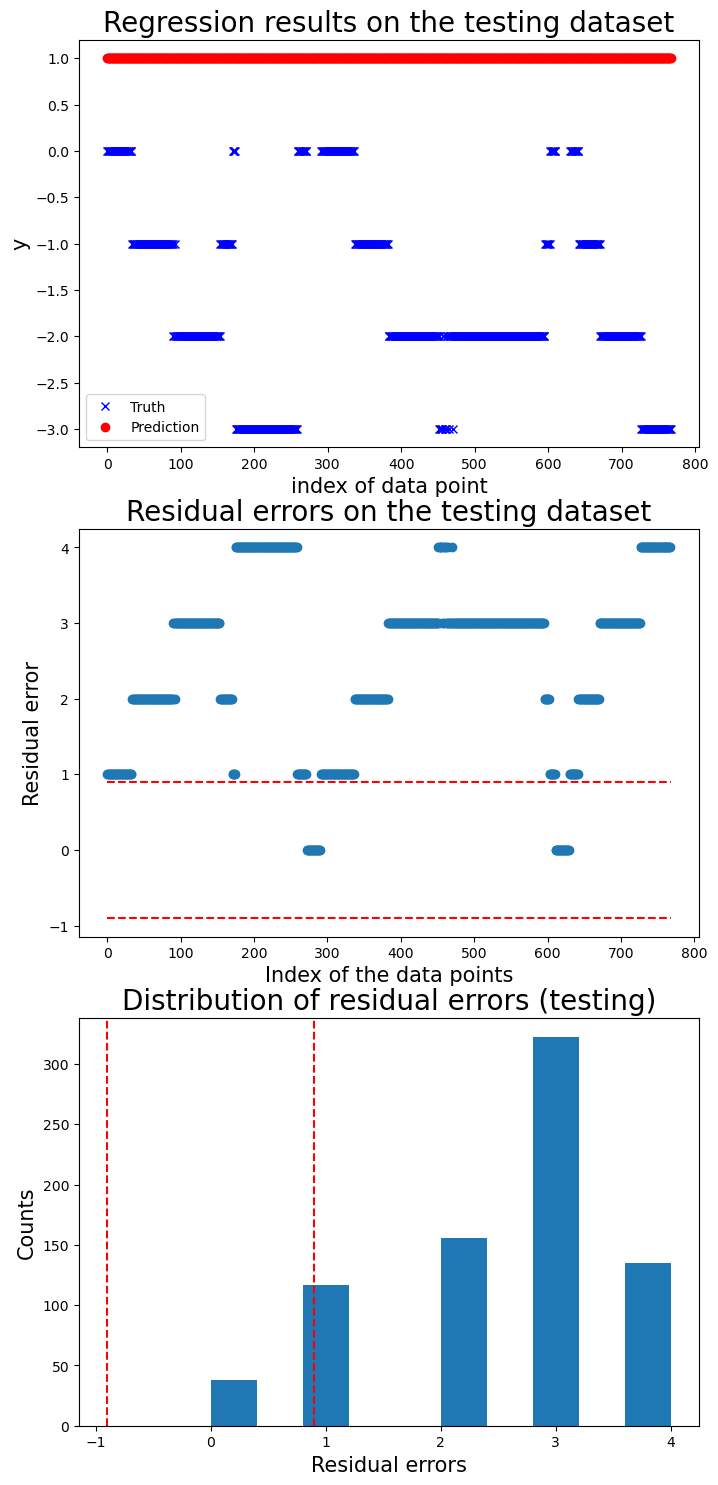

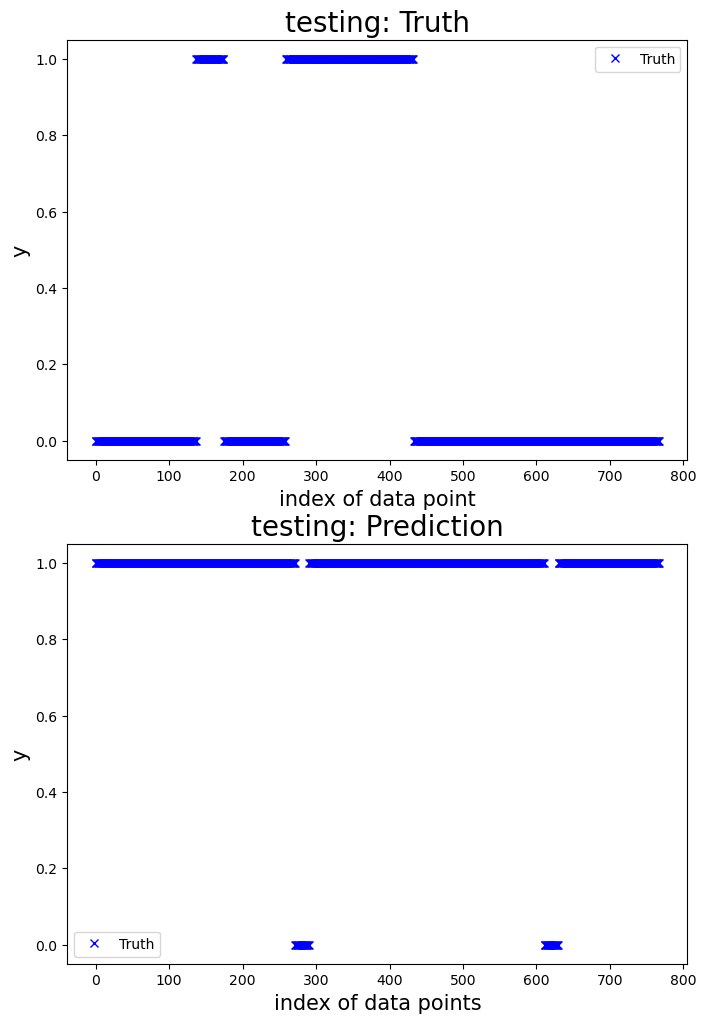

   Accuracy  Precision    Recall  F1 score
0  0.171609   0.088889  0.852989  0.161000
1  0.333333   0.345794  0.902439  0.500000
2  0.165154   0.177388  0.705426  0.283489
3  0.033816   0.034757  0.555556  0.065421
4  0.414912   0.339357  0.974063  0.503351
5  0.796610   0.810345  0.979167  0.886792
6  0.276042   0.264384  0.910377  0.409766


Mean performance metric and standard error:
Accuracy: 0.3131 +- 0.2469
Precision: 0.2944 +- 0.2566
Recall: 0.8400 +- 0.1557
F1 score: 0.4014 +- 0.2709



In [14]:
# Test the class FaultDetectReg
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utility import read_all_test_data_from_path, extract_selected_feature, prepare_sliding_window, FaultDetectReg

from sklearn.ensemble import IsolationForest


def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()
    df['temperature'] = df['temperature'] - df['temperature'].iloc[0]

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()
    df['voltage'] = df['voltage'] - df['voltage'].iloc[0]

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()
    df['position'] = df['position'] - df['position'].iloc[0]


# Read data.
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

# Pre-train the model.
# Get all the normal data.
normal_test_id = ['20240105_164214', 
    '20240105_165300', 
    '20240105_165972', 
    '20240320_152031', 
    '20240320_153841', 
    '20240320_155664', 
    '20240321_122650', 
    '20240325_135213',
    '20240325_152902', 
    '20240426_141190', 
    '20240426_141532', 
    '20240426_141602', 
    '20240426_141726', 
    '20240426_141938', 
    '20240426_141980', 
    '20240503_164435']

df_tr = df_data[df_data['test_condition'].isin(normal_test_id)]

feature_list_all = ['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# feature_list_all = ['time', 'data_motor_1_position', 
#                 'data_motor_2_position', 
#                 'data_motor_3_position', 
#                 'data_motor_4_position', 
#                 'data_motor_5_position', 
#                 'data_motor_6_position', 'data_motor_6_temperature']

# Prepare feature and response of the training dataset.
x_tr_org, y_temp_tr_org = extract_selected_feature(df_data=df_tr, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# Enrich the features based on the sliding window.
window_size = 10
sample_step = 1
prediction_lead_time = 1 
threshold = .9
abnormal_limit = 3

x_tr, y_temp_tr = prepare_sliding_window(df_x=x_tr_org, y=y_temp_tr_org, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('regressor', IsolationForest(n_estimators=400, 
                                  max_samples=0.5, 
                                  contamination=0.005, 
                                  max_features=0.75, 
                                  bootstrap=True))    # Step 2: model IsolationForest
]

# Create the pipeline
mdl_IsolationForest = Pipeline(steps)
# Fit the model
mdl = mdl_IsolationForest.fit(x_tr, y_temp_tr)

# Test data.
test_id = [
    '20240325_155003',
    '20240425_093699',
    '20240425_094425',
    '20240426_140055',
    '20240503_163963',
    '20240503_164675',
    '20240503_165189'
]
df_test = df_data[df_data['test_condition'].isin(test_id)]

# Define the fault detector.
detector_reg = FaultDetectReg(reg_mdl=mdl, threshold=threshold, abnormal_limit=abnormal_limit, window_size=window_size, sample_step=sample_step, pred_lead_time=prediction_lead_time)

# # Test
# _, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
# x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# # Predict the temperature
# detector_reg.threshold = 1
# y_label_pred_tr, y_temp_pred_tr = detector_reg.predict(df_x_test=x_tr_org, y_response_test=y_temp_tr_org)
# y_label_pred_tmp, y_temp_pred_tmp = detector_reg.predict(df_x_test=x_test_org, y_response_test=y_temp_test_org)

# # Get the true values.
# _, y_label_test = prepare_sliding_window(df_x=x_test_org, y=y_label_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='clf')
# _, y_temp_test_seq = prepare_sliding_window(df_x=x_test_org, y=y_temp_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')


# show_reg_result(y_tr=y_temp_tr, y_test=y_temp_test_seq, y_pred_tr=y_temp_pred_tr, y_pred=y_temp_pred_tmp, threshold=detector_reg.threshold)
# show_clf_result(y_tr=np.zeros(len(y_label_pred_tr)), y_test=y_label_test, y_pred_tr=y_label_pred_tr, y_pred=y_label_pred_tmp)

# # Run cross validation
n_fold = 7
_, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

motor_idx = 6
print(f'Model for motor {motor_idx}:')
# Run cross validation.
df_perf = detector_reg.run_cross_val(df_x=x_test_org, y_label=y_label_test_org, y_response=y_temp_test_org, 
                                        n_fold=n_fold)
print(df_perf)
print('\n')
# Print the mean performance and standard error.
print('Mean performance metric and standard error:')
for name, metric, error in zip(df_perf.columns, df_perf.mean(), df_perf.std()):
    print(f'{name}: {metric:.4f} +- {error:.4f}') 
print('\n')